# Artificial Neural Networks - Multi-label approach
 
  
### Perform a thorough data analysis and design a neural network to classify eletrical appliances into different classes, allowing that multiple labels may be assigned to each appliance.
  
   
### DATASET 
Was provided a csv dabatase with 100 appliences, observed 200 times and labeled with their current class.
   
### GOAL 
Create a model able to evaluate the results of transient signals from electrical appliances (signals obtained in a 2s window when the appliance is switched on) in order to classify them into N different classes according with their results pattern.
  
### ANALYSIS STAGES:
1) Load the data and perform data cleaning (if necessary)<br>
2) Visualize the data for comprehension <br>
3) Transform the labels into a multi-class correct representation<br>
4) Prepare the data to be presented to ML<br>
5) Build the neural network with its respective parameters<br>
6) Test and validate the results<br>
7) Evaluate the use of PCA (Principal Component Analysis)<br>
8) Conclusion<br>


### Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

## TASK 1 - Load the data and perform data cleaning 

### Acquiring data from the csv file

This data is outdated, it does not necessarily represent the current appliances. But, these studies are still current and continue to use AI features in their solutions

In [2]:
db = pd.read_csv('db.csv')
db

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t191,t192,t193,t194,t195,t196,t197,t198,t199,Classes
0,24.00,24.00,23.00,25.00,24.00,25.00,24.00,24.00,22.00,25.00,...,1.00,-1.00,1.00,-1.00,1.00,0.00,1.00,0.00,0.00,1
1,23.00,23.00,22.00,21.00,21.00,22.00,23.00,23.00,22.00,21.00,...,-1.00,1.00,0.00,1.00,-1.00,0.00,-1.00,1.00,0.00,1
2,-0.55,-0.55,-0.55,3.45,13.45,11.45,18.45,18.45,20.45,20.45,...,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,0.45,-0.55,1
3,12.30,10.30,15.30,15.30,16.30,15.30,17.30,16.30,17.30,15.30,...,-0.70,0.30,-0.70,0.30,-0.70,1.30,-0.70,1.30,-0.70,1
4,24.85,2.85,5.85,-1.15,2.85,-1.15,1.85,-1.15,0.85,-1.15,...,-0.15,0.85,-1.15,-0.15,-1.15,0.85,-0.15,0.85,-0.15,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,14.70,4.70,2.70,-0.30,0.70,0.70,2.70,1.70,1.70,0.70,...,-0.30,-0.30,-0.30,0.70,-0.30,0.70,-1.30,-1.30,-0.30,5
96,11.55,5.55,2.55,1.55,0.55,1.55,0.55,0.55,-0.45,0.55,...,0.55,-0.45,0.55,-1.45,0.55,-0.45,0.55,-0.45,0.55,6
97,14.35,4.35,1.35,2.35,-0.65,0.35,0.35,1.35,0.35,0.35,...,-0.65,0.35,-0.65,0.35,-1.65,0.35,0.35,0.35,-0.65,6
98,22.70,-5.30,-0.30,-5.30,-1.30,-3.30,-1.30,-3.30,-2.30,-3.30,...,-2.30,1.70,-1.30,1.70,-0.30,0.70,-2.30,0.70,-1.30,7


In [3]:
db.info

<bound method DataFrame.info of        t0     t1     t2     t3     t4     t5     t6     t7     t8     t9  ...  \
0   24.00  24.00  23.00  25.00  24.00  25.00  24.00  24.00  22.00  25.00  ...   
1   23.00  23.00  22.00  21.00  21.00  22.00  23.00  23.00  22.00  21.00  ...   
2   -0.55  -0.55  -0.55   3.45  13.45  11.45  18.45  18.45  20.45  20.45  ...   
3   12.30  10.30  15.30  15.30  16.30  15.30  17.30  16.30  17.30  15.30  ...   
4   24.85   2.85   5.85  -1.15   2.85  -1.15   1.85  -1.15   0.85  -1.15  ...   
..    ...    ...    ...    ...    ...    ...    ...    ...    ...    ...  ...   
95  14.70   4.70   2.70  -0.30   0.70   0.70   2.70   1.70   1.70   0.70  ...   
96  11.55   5.55   2.55   1.55   0.55   1.55   0.55   0.55  -0.45   0.55  ...   
97  14.35   4.35   1.35   2.35  -0.65   0.35   0.35   1.35   0.35   0.35  ...   
98  22.70  -5.30  -0.30  -5.30  -1.30  -3.30  -1.30  -3.30  -2.30  -3.30  ...   
99  -5.30  -6.30  -6.30  -6.30  -5.30  -3.30  -4.30  -6.30  -6.30  -4.30  ...

In [4]:
db.groupby(['Classes']).count()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t190,t191,t192,t193,t194,t195,t196,t197,t198,t199
Classes,,,,,,,,,,,,,,,,,,,,,
1,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
2,22,22,22,22,22,22,22,22,22,22,...,22,22,22,22,22,22,22,22,22,22
3,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30
4,8,8,8,8,8,8,8,8,8,8,...,8,8,8,8,8,8,8,8,8,8
5,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
6,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4
7,4,4,4,4,4,4,4,4,4,4,...,4,4,4,4,4,4,4,4,4,4


In [5]:
db.groupby(['Classes']).mean()

,t0,t1,t2,t3,t4,t5,t6,t7,t8,t9,...,t190,t191,t192,t193,t194,t195,t196,t197,t198,t199
Classes,,,,,,,,,,,,,,,,,,,,,
1,13.306250,12.681250,15.931250,16.806250,17.931250,17.181250,17.681250,19.306250,20.931250,20.306250,...,0.056250,-0.443750,0.181250,-0.068750,0.306250,-0.318750,0.306250,-0.193750,0.431250,-0.318750
2,2.227273,1.045455,1.409091,0.318182,0.954545,0.409091,0.863636,0.409091,0.863636,0.136364,...,0.136364,0.136364,-0.045455,-0.136364,0.227273,-0.045455,0.136364,-0.318182,-0.045455,-0.045455
3,12.740000,12.006667,12.273333,11.073333,10.406667,9.606667,9.740000,8.873333,8.606667,8.073333,...,0.006667,0.940000,-0.393333,-0.193333,0.073333,0.206667,0.673333,-0.260000,-0.593333,-0.193333
4,8.550000,2.800000,4.300000,2.550000,3.800000,3.050000,4.550000,3.300000,4.050000,3.050000,...,0.550000,-0.450000,0.550000,-0.200000,0.050000,-0.950000,0.550000,-0.450000,0.800000,-0.450000
5,19.518750,12.018750,8.268750,7.518750,6.268750,6.018750,5.768750,5.768750,4.893750,4.893750,...,0.143750,-0.231250,-0.856250,0.143750,0.143750,0.393750,0.018750,0.268750,-0.606250,0.018750
6,12.950000,4.950000,1.950000,1.950000,-0.050000,0.950000,0.450000,0.950000,-0.050000,0.450000,...,-0.050000,-0.050000,-0.050000,-0.050000,-0.550000,-0.550000,-0.050000,0.450000,-0.050000,-0.050000
7,8.700000,-5.800000,-3.300000,-5.800000,-3.300000,-3.300000,-2.800000,-4.800000,-4.300000,-3.800000,...,1.200000,-1.300000,1.200000,-1.300000,0.700000,1.200000,1.200000,-1.300000,0.200000,-0.800000


## TASK 2 - Visualize the data for comprehension

### Preparing the data for plotting a histogram


In [6]:
Classe1 = pd.DataFrame(db[db['Classes']==1])
Classe1.drop('Classes', axis = 1, inplace=True)
Classe_1 = pd.Series(Classe1.values.ravel('F'))

In [7]:
Classe2 = pd.DataFrame(db[db['Classes']==2])
Classe2.drop('Classes', axis = 1, inplace=True)
Classe_2 = pd.Series(Classe2.values.ravel('F'))

In [8]:
Classe3 = pd.DataFrame(db[db['Classes']==3])
Classe3.drop('Classes', axis = 1, inplace=True)
Classe_3 = pd.Series(Classe3.values.ravel('F'))

In [9]:
Classe4 = pd.DataFrame(db[db['Classes']==4])
Classe4.drop('Classes', axis = 1, inplace=True)
Classe_4 = pd.Series(Classe4.values.ravel('F'))

In [10]:
Classe5 = pd.DataFrame(db[db['Classes']==5])
Classe5.drop('Classes', axis = 1, inplace=True)
Classe_5 = pd.Series(Classe5.values.ravel('F'))

In [11]:
Classe6 = pd.DataFrame(db[db['Classes']==6])
Classe6.drop('Classes', axis = 1, inplace=True)
Classe_6 = pd.Series(Classe6.values.ravel('F'))

In [12]:
Classe7 = pd.DataFrame(db[db['Classes']==7])
Classe7.drop('Classes', axis = 1, inplace=True)
Classe_7 = pd.Series(Classe7.values.ravel('F'))

**** CLASSE 1 **** Observations: 16 * 200  | Mean: 4.1  | Median: 0.45 | Standard deviation: 8.18
**** CLASSE 2 **** Observations: 22 * 200  | Mean: 0.1  | Median: 0.1  | Standard deviation: 1.08
**** CLASSE 3 **** Observations: 30 * 200  | Mean: 1.69 | Median: 0.65 | Standard deviation: 3.87
**** CLASSE 4 **** Observations:  8 * 200  | Mean: 1.73 | Median: 1.05 | Standard deviation: 2.57
**** CLASSE 5 **** Observations: 16 * 200  | Mean: 0.82 | Median: 0.25 | Standard deviation: 3.14
**** CLASSE 6 **** Observations:  4 * 200  | Mean: 0.13 | Median: 0.35 | Standard deviation: 1.17
**** CLASSE 7 **** Observations:  4 * 200  | Mean: -1.1 | Median: -1.3 | Standard deviation: 3.21


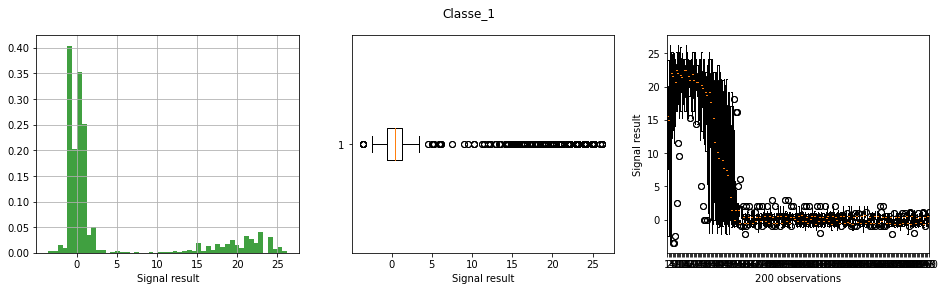

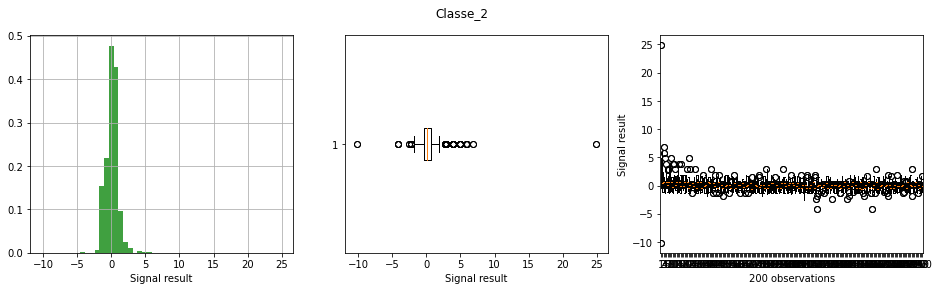

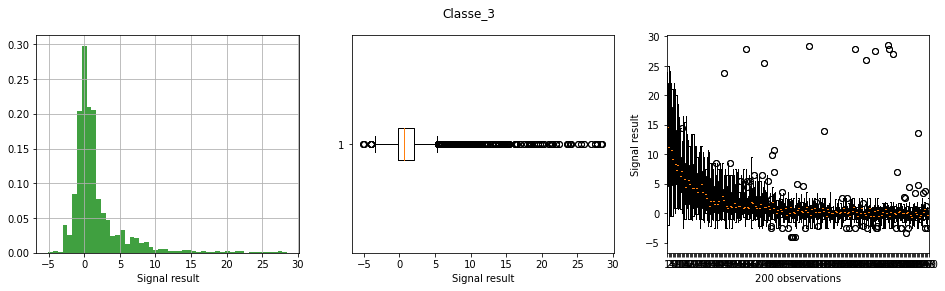

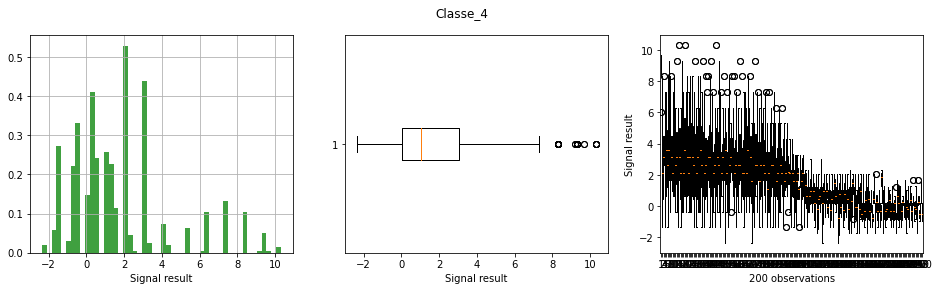

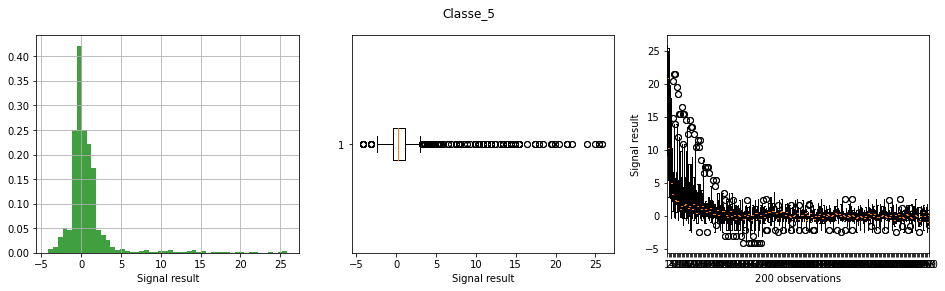

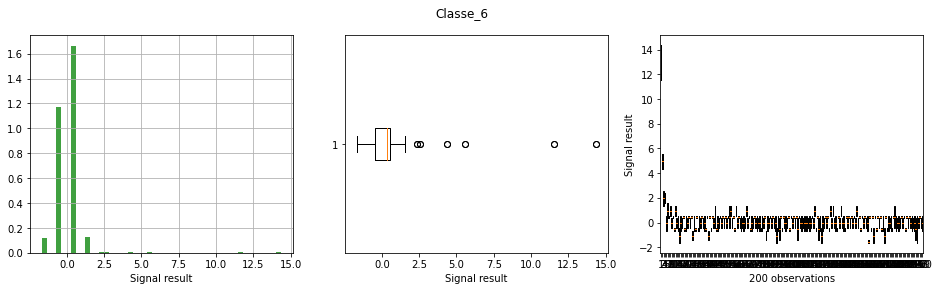

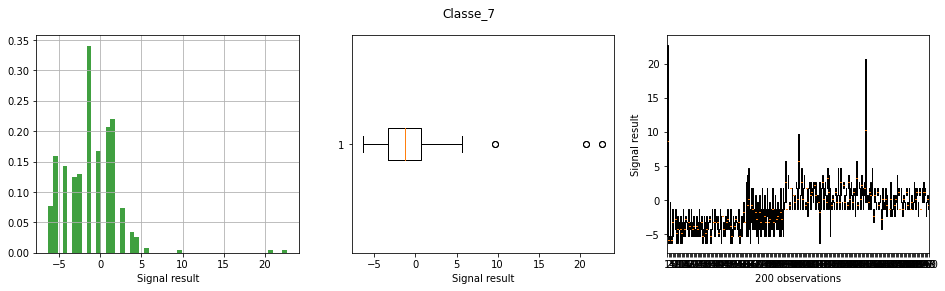

In [13]:

print(f'**** CLASSE 1 **** Observations: {int(len(Classe_1)/200)} * 200  | Mean: {round(np.mean(Classe_1),2)}  | Median: {round(np.median(Classe_1),2)} | Standard deviation: {round(np.std(Classe_1),2)}')

fig, ax = plt.subplots(1, 3, figsize = (16,4))

n, bins, patches = ax[0].hist(Classe_1, 50, density=True, facecolor='g', alpha=0.75)
ax[0].set_xlabel('Signal result')
ax[0].grid(True)

ax[1].boxplot(Classe_1, vert=False)
ax[1].set_title('')
ax[1].set_xlabel('Signal result')
ax[1].set_ylabel('')

ax[2].boxplot(Classe1)
ax[2].set_ylabel('Signal result')
ax[2].set_xlabel('200 observations')

fig.suptitle('Classe_1')
fig.show()

#################################

print(f'**** CLASSE 2 **** Observations: {int(len(Classe_2)/200)} * 200  | Mean: {round(np.mean(Classe_2),2)}  | Median: {round(np.median(Classe_2),2)}  | Standard deviation: {round(np.std(Classe_2),2)}')

fig, ax = plt.subplots(1, 3, figsize = (16,4))

n, bins, patches = ax[0].hist(Classe_2, 50, density=True, facecolor='g', alpha=0.75)
ax[0].set_xlabel('Signal result')
ax[0].grid(True)

ax[1].boxplot(Classe_2, vert=False)
ax[1].set_title('')
ax[1].set_xlabel('Signal result')
ax[1].set_ylabel('')

ax[2].boxplot(Classe2)
ax[2].set_ylabel('Signal result')
ax[2].set_xlabel('200 observations')

fig.suptitle('Classe_2')
fig.show()

#################################

print(f'**** CLASSE 3 **** Observations: {int(len(Classe_3)/200)} * 200  | Mean: {round(np.mean(Classe_3),2)} | Median: {round(np.median(Classe_3),2)} | Standard deviation: {round(np.std(Classe_3),2)}')

fig, ax = plt.subplots(1, 3, figsize = (16,4))

n, bins, patches = ax[0].hist(Classe_3, 50, density=True, facecolor='g', alpha=0.75)
ax[0].set_xlabel('Signal result')
ax[0].grid(True)

ax[1].boxplot(Classe_3, vert=False)
ax[1].set_title('')
ax[1].set_xlabel('Signal result')
ax[1].set_ylabel('')

ax[2].boxplot(Classe3)
ax[2].set_ylabel('Signal result')
ax[2].set_xlabel('200 observations')

fig.suptitle('Classe_3')
fig.show()

#################################

print(f'**** CLASSE 4 **** Observations:  {int(len(Classe_4)/200)} * 200  | Mean: {round(np.mean(Classe_4),2)} | Median: {round(np.median(Classe_4),2)} | Standard deviation: {round(np.std(Classe_4),2)}')

fig, ax = plt.subplots(1, 3, figsize = (16,4))

n, bins, patches = ax[0].hist(Classe_4, 50, density=True, facecolor='g', alpha=0.75)
ax[0].set_xlabel('Signal result')
ax[0].grid(True)

ax[1].boxplot(Classe_4, vert=False)
ax[1].set_title('')
ax[1].set_xlabel('Signal result')
ax[1].set_ylabel('')

ax[2].boxplot(Classe4)
ax[2].set_ylabel('Signal result')
ax[2].set_xlabel('200 observations')

fig.suptitle('Classe_4')
fig.show()

#################################

print(f'**** CLASSE 5 **** Observations: {int(len(Classe_5)/200)} * 200  | Mean: {round(np.mean(Classe_5),2)} | Median: {round(np.median(Classe_5),2)} | Standard deviation: {round(np.std(Classe_5),2)}')

fig, ax = plt.subplots(1, 3, figsize = (16,4))

n, bins, patches = ax[0].hist(Classe_5, 50, density=True, facecolor='g', alpha=0.75)
ax[0].set_xlabel('Signal result')
ax[0].grid(True)

ax[1].boxplot(Classe_5, vert=False)
ax[1].set_title('')
ax[1].set_xlabel('Signal result')
ax[1].set_ylabel('')

ax[2].boxplot(Classe5)
ax[2].set_ylabel('Signal result')
ax[2].set_xlabel('200 observations')

fig.suptitle('Classe_5')
fig.show()

#################################

print(f'**** CLASSE 6 **** Observations:  {int(len(Classe_6)/200)} * 200  | Mean: {round(np.mean(Classe_6),2)} | Median: {round(np.median(Classe_6),2)} | Standard deviation: {round(np.std(Classe_6),2)}')

fig, ax = plt.subplots(1, 3, figsize = (16,4))

n, bins, patches = ax[0].hist(Classe_6, 50, density=True, facecolor='g', alpha=0.75)
ax[0].set_xlabel('Signal result')
ax[0].grid(True)

ax[1].boxplot(Classe_6, vert=False)
ax[1].set_title('')
ax[1].set_xlabel('Signal result')
ax[1].set_ylabel('')

ax[2].boxplot(Classe6)
ax[2].set_ylabel('Signal result')
ax[2].set_xlabel('200 observations')

fig.suptitle('Classe_6')
fig.show()

#################################

print(f'**** CLASSE 7 **** Observations:  {int(len(Classe_7)/200)} * 200  | Mean: {round(np.mean(Classe_7),2)} | Median: {round(np.median(Classe_7),2)} | Standard deviation: {round(np.std(Classe_7),2)}')

fig, ax = plt.subplots(1, 3, figsize = (16,4))

n, bins, patches = ax[0].hist(Classe_7, 50, density=True, facecolor='g', alpha=0.75)
ax[0].set_xlabel('Signal result')
ax[0].grid(True)

ax[1].boxplot(Classe_7, vert=False)
ax[1].set_title('')
ax[1].set_xlabel('Signal result')
ax[1].set_ylabel('')

ax[2].boxplot(Classe7)
ax[2].set_ylabel('Signal result')
ax[2].set_xlabel('200 observations')

fig.suptitle('Classe_7')
fig.show()

## TASK 3 - Transforming the labels into a multi-class correct representation

In [14]:
# Transforming classes into dummies
dummy = pd.get_dummies(db['Classes'])
db = pd.concat([db, dummy], axis=1)
db.drop('Classes', axis = 1, inplace=True)

In [15]:
# Separating x and y, where y gets the dummied columns and X the rest of the dataframe without the dummied columns
y = db[[1,2,3,4,5,6,7]]
x = db.drop([1,2,3,4,5,6,7], axis=1)

## TASK 4 - Preparing the data to be presented to ML

In [16]:
# Standardizing the x-values
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [17]:
# Splitting training and testing databases
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, random_state=1, test_size=0.3)

## TASK 5 - Build the neural network with its respective parameters 
### Searching for the best parameters combination (Grid Searching)

In [18]:
#parameters = {'hidden_layer_sizes':range(1,100,20), 'activation':('identity', 'logistic', 'tanh', 'relu'), #'solver':('lbfgs', 'sgd', 'adam'), 'learning_rate_init': (0.001, 0.002)}

In [19]:
#clf_grid = MLPClassifier(max_iter=300, random_state=1, validation_fraction=0.1, verbose=True)
#gridmodel = GridSearchCV(clf_grid, parameters)
#gridmodel.fit(x_train, y_train)
#print(gridmodel.best_estimator_)
#model = gridmodel.best_estimator_

In [20]:
model = MLPClassifier(activation='logistic', hidden_layer_sizes=61, max_iter=300, random_state=1, solver='lbfgs', verbose=True)

In [21]:
model.fit(x_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=61, max_iter=300,
              random_state=1, solver='lbfgs', verbose=True)

In [22]:
model.predict(x_test)

array([[1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0]])

## TASK 6  - Test and validate the results

In [23]:
# Test Accuracy
model.score(x_test,y_test)

0.8

In [24]:
y_pred = model.predict(x_test)
y_real = y_test.to_numpy()

ytrue = []
yhat = []

for n in y_real:
    ytrue.append(str(n))

for n in y_pred:
    yhat.append(str(n))


print('****** Model Results ******')

print("Accuracy: ", round(metrics.accuracy_score(ytrue, yhat),2))
print(metrics.classification_report(ytrue, yhat, digits=2))


****** Model Results ******
Accuracy:  0.8
                 precision    recall  f1-score   support

[0 0 0 0 0 0 0]       0.00      0.00      0.00         0
[0 0 0 0 0 0 1]       1.00      1.00      1.00         1
[0 0 0 0 0 1 0]       1.00      1.00      1.00         1
[0 0 0 0 1 0 0]       1.00      0.60      0.75         5
[0 0 0 1 0 0 0]       0.50      1.00      0.67         2
[0 0 1 0 0 0 0]       1.00      0.78      0.88         9
[0 1 0 0 0 0 0]       0.71      0.71      0.71         7
[1 0 0 0 0 0 0]       1.00      1.00      1.00         5

       accuracy                           0.80        30
      macro avg       0.78      0.76      0.75        30
   weighted avg       0.90      0.80      0.83        30



## TASK 7 - Evaluate the use of PCA (Principal Component Analysis)

In [25]:
pca = PCA().fit(x_train)

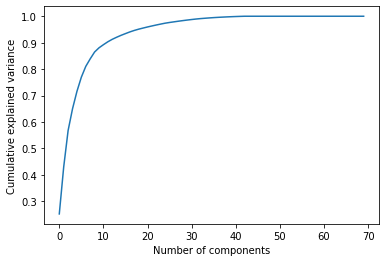

In [26]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance');

In [27]:
pca = PCA(n_components=0.87)
pca.fit(x_train)
x_pca_train = pca.transform(x_train)

In [28]:
print(f'Original Model dimensionality: {x_train.shape}')
print(f'PCA Model dimensionality: {x_pca_train.shape}')

Original Model dimensionality: (70, 200)
PCA Model dimensionality: (70, 10)


In [29]:
#clf_grid_PCA = MLPClassifier(max_iter=300, random_state=1, validation_fraction=0.1, verbose=True)
#gridmodel_PCA = GridSearchCV(clf_grid_PCA, parameters)
#gridmodel_PCA.fit(x_pca_train, y_train)
#print(gridmodel_PCA.best_estimator_)
#model_PCA = gridmodel_PCA.best_estimator_

In [30]:
model_PCA = MLPClassifier(activation='logistic', hidden_layer_sizes=61, max_iter=300, random_state=1, solver='lbfgs', verbose=True)

In [31]:
model_PCA.fit(x_pca_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=61, max_iter=300,
              random_state=1, solver='lbfgs', verbose=True)

In [32]:
# Test Accuracy
x_pca_test = pca.transform(x_test)
model_PCA.predict(x_pca_test)
model_PCA.score(x_pca_test,y_test)

0.7333333333333333

In [33]:
y_pred1 = model_PCA.predict(pca.transform(x_test))
yhat1 = []


for n in y_pred1:
    yhat1.append(str(n))

print('****** PCA Model Results ******')

print("Accuracy: ", round(metrics.accuracy_score(ytrue, yhat1),2))
print(metrics.classification_report(ytrue, yhat1, digits=2))


****** PCA Model Results ******
Accuracy:  0.73
                 precision    recall  f1-score   support

[0 0 0 0 0 0 0]       0.00      0.00      0.00         0
[0 0 0 0 0 0 1]       1.00      1.00      1.00         1
[0 0 0 0 0 1 0]       1.00      1.00      1.00         1
[0 0 0 0 1 0 0]       1.00      0.60      0.75         5
[0 0 0 1 0 0 0]       1.00      1.00      1.00         2
[0 0 1 0 0 0 0]       1.00      0.78      0.88         9
[0 1 0 0 0 0 0]       0.60      0.43      0.50         7
[1 0 0 0 0 0 0]       1.00      1.00      1.00         5
[1 0 0 0 1 0 0]       0.00      0.00      0.00         0

       accuracy                           0.73        30
      macro avg       0.73      0.65      0.68        30
   weighted avg       0.91      0.73      0.80        30



## TASK 8 - Conclusion

Using gridsearch to look for optimal parameters, an artificial neural network was identified that brought good accuracy. This model brings accuracy of 0.8 for the desired multi-label classification purpose with the following parameters:

#### activation function ='logistic' | hidden_layer_sizes = 61 | max_iterations = 300 | solver ='lbfgs'

The PCA of 87% reduction in dimensionality from 200 to 10 components brought residual loss in accuracy, dropping it from 0.8 on the original model to 0.73 after PCA. The accuracy reduction seems reasonable considering its trade-off for the potential processing performance enhancement.